<a href="https://colab.research.google.com/github/jiyanshud22/Champhunt_post_recommendation/blob/main/%E2%9A%BDdetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import numpy as np
import os
import re

# Function to extract frames from the video
def extract_frames(video_path, output_folder='frames'):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"{frame_count}.png")
        cv2.imwrite(frame_path, frame)
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

# Function to preprocess frames for ball detection
def preprocess_frames(input_folder='frames'):
    frames = os.listdir(input_folder)
    frames.sort(key=lambda f: int(re.sub('\D', '', f)))
    images = []
    for frame_file in frames:
        img = cv2.imread(os.path.join(input_folder, frame_file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.GaussianBlur(img, (15, 15), 0)
        images.append(img)
    return np.array(images), frames

# Function to detect and highlight the ball in each frame
def detect_ball_in_frames(frames, input_folder='frames', output_folder='output_frames'):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for frame_file in frames:
        img = cv2.imread(os.path.join(input_folder, frame_file))
        img_copy = img.copy()

        # Convert to HSV color space for color-based segmentation
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        # Define color range for ball detection (tweak as needed)
        lower_color = np.array([0, 50, 50])  # Adjust these values based on the ball color
        upper_color = np.array([30, 255, 255])  # Adjust these values based on the ball color

        # Create a mask for the defined color range
        mask = cv2.inRange(hsv, lower_color, upper_color)
        mask = cv2.GaussianBlur(mask, (15, 15), 0)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            if cv2.contourArea(contour) > 50:  # Adjust the threshold as needed
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, img_copy)

# Function to compile frames into a video
def compile_video(frames_folder='output_frames', output_video='output_video.avi', fps=30):
    frames = os.listdir(frames_folder)
    frames.sort(key=lambda f: int(re.sub('\D', '', f)))
    frame_array = []

    for frame_file in frames:
        img = cv2.imread(os.path.join(frames_folder, frame_file))
        if img is not None:
            height, width, layers = img.shape
            size = (width, height)
            frame_array.append(img)

    if frame_array:
        out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'XVID'), fps, size)
        for frame in frame_array:
            out.write(frame)
        out.release()
    else:
        print("No valid frames to compile into a video.")

# Main function to process the video
def process_video(input_video_path):
    # Step 1: Extract frames from the video
    extract_frames(input_video_path)
    # Step 2: Preprocess frames for ball detection
    images, frames = preprocess_frames()
    # Step 3: Detect and highlight the ball in each frame
    detect_ball_in_frames(frames)
    # Step 4: Compile the processed frames back into a video
    compile_video()

# path to your input video
process_video('/content/Untitled video - Made with Clipchamp.mp4')

print("Ball tracking complete")


Ball tracking complete


Error opening video stream or file


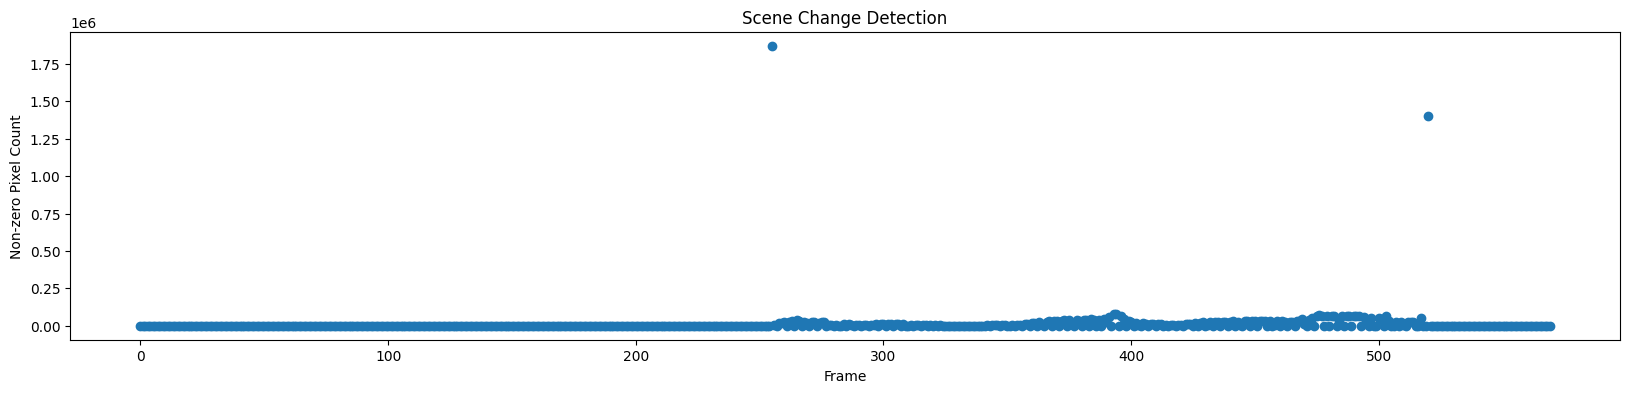

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [15]:
import cv2
import numpy as np
import os
import re

# Function to extract frames from the video
def extract_frames(video_path, output_folder='frames'):
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"{frame_count}.png")
        cv2.imwrite(frame_path, frame)
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

# Function to preprocess frames for ball detection
def preprocess_frames(input_folder='frames', resize_dim=(640, 480)):
    frames = os.listdir(input_folder)
    frames.sort(key=lambda f: int(re.sub('\D', '', f)))
    images = []
    valid_frames = []

    for frame_file in frames:
        img_path = os.path.join(input_folder, frame_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Warning: Failed to load frame {frame_file}. Skipping.")
            continue

        # Resize the image to a consistent shape
        img = cv2.resize(img, resize_dim)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.GaussianBlur(img, (15, 15), 0)

        images.append(img)
        valid_frames.append(frame_file)

    return np.stack(images, axis=0), valid_frames

# Function to detect and highlight the ball in each frame
def detect_ball_in_frames(frames, lower_color, upper_color, input_folder='frames', output_folder='output_frames', resize_dim=(640, 480)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for frame_file in frames:
        img = cv2.imread(os.path.join(input_folder, frame_file))
        if img is None:
            print(f"Warning: Failed to process frame {frame_file}. Skipping.")
            continue

        # Resize the image to a consistent shape
        img = cv2.resize(img, resize_dim)
        img_copy = img.copy()

        # Convert to HSV color space for color-based segmentation
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Create a mask for the defined color range
        mask = cv2.inRange(hsv, lower_color, upper_color)
        mask = cv2.GaussianBlur(mask, (15, 15), 0)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            area = cv2.contourArea(contour)

            # Filter based on contour area (adjust the thresholds as needed)
            if 50 < area < 500:  # Set a maximum area threshold to ignore large objects
                x, y, w, h = cv2.boundingRect(contour)

                # Check if the contour is approximately circular
                aspect_ratio = float(w) / h
                if 0.8 <= aspect_ratio <= 1.2:  # Aspect ratio close to 1 indicates a circle
                    # Draw a rectangle around the detected ball
                    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

        output_path = os.path.join(output_folder, frame_file)
        cv2.imwrite(output_path, img_copy)

# Function to compile frames into a video
def compile_video(frames_folder='output_frames', output_video='output_video.avi', fps=30):
    frames = os.listdir(frames_folder)
    frames.sort(key=lambda f: int(re.sub('\D', '', f)))
    frame_array = []

    for frame_file in frames:
        img = cv2.imread(os.path.join(frames_folder, frame_file))
        if img is not None:
            height, width, layers = img.shape
            size = (width, height)
            frame_array.append(img)

    if frame_array:
        out = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'XVID'), fps, size)
        for frame in frame_array:
            out.write(frame)
        out.release()
    else:
        print("No valid frames to compile into a video.")

# Function to ask the user for the ball color and set the color range
def get_ball_color_range():
    print("Select the number corresponding to the color of the ball:")
    print("1. Red")
    print("2. White")
    print("3. Yellow")
    print("4. Custom (enter your own values)")

    choice = input("Enter the option number: ").strip()

    if choice == '1':  # Red
        return np.array([0, 50, 50]), np.array([10, 255, 255])
    elif choice == '2':  # White
        return np.array([0, 0, 200]), np.array([180, 30, 255])
    elif choice == '3':  # Yellow
        return np.array([20, 100, 100]), np.array([30, 255, 255])
    elif choice == '4':  # Custom
        lower_h = int(input("Enter lower hue value (0-179): "))
        lower_s = int(input("Enter lower saturation value (0-255): "))
        lower_v = int(input("Enter lower value (brightness) value (0-255): "))
        upper_h = int(input("Enter upper hue value (0-179): "))
        upper_s = int(input("Enter upper saturation value (0-255): "))
        upper_v = int(input("Enter upper value (brightness) value (0-255): "))
        return np.array([lower_h, lower_s, lower_v]), np.array([upper_h, upper_s, upper_v])
    else:
        print("Invalid choice. Using default color range for red.")
        return np.array([0, 50, 50]), np.array([10, 255, 255])

# Main function to process the video
def process_video(input_video_path):
    # Step 1: Ask the user for the color of the ball and get the color range
    lower_color, upper_color = get_ball_color_range()
    # Step 2: Extract frames from the video
    extract_frames(input_video_path)
    # Step 3: Preprocess frames for ball detection
    images, frames = preprocess_frames()
    # Step 4: Detect and highlight the ball in each frame
    detect_ball_in_frames(frames, lower_color, upper_color)
    # Step 5: Compile the processed frames back into a video
    compile_video()

# Path to your input video
process_video('/content/Recording 2024-11-05 230942.mp4')

print("Ball tracking and video processing completed")


Select the number corresponding to the color of the ball:
1. Red
2. White
3. Yellow
4. Custom (enter your own values)
Enter the option number: 1
Ball tracking and video processing completed
